In [177]:
import numpy as np
import matplotlib.pyplot as plt

<>:61: SyntaxWarning: invalid escape sequence '\m'
<>:61: SyntaxWarning: invalid escape sequence '\s'
<>:61: SyntaxWarning: invalid escape sequence '\m'
<>:61: SyntaxWarning: invalid escape sequence '\s'
C:\Users\jens2\AppData\Local\Temp\ipykernel_27244\3587841943.py:61: SyntaxWarning: invalid escape sequence '\m'
  plt.title(f"HODL vs Liquidity pool vs Rebalanced, with $\mu = ${mu}, $\sigma = ${sigma}")
C:\Users\jens2\AppData\Local\Temp\ipykernel_27244\3587841943.py:61: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f"HODL vs Liquidity pool vs Rebalanced, with $\mu = ${mu}, $\sigma = ${sigma}")


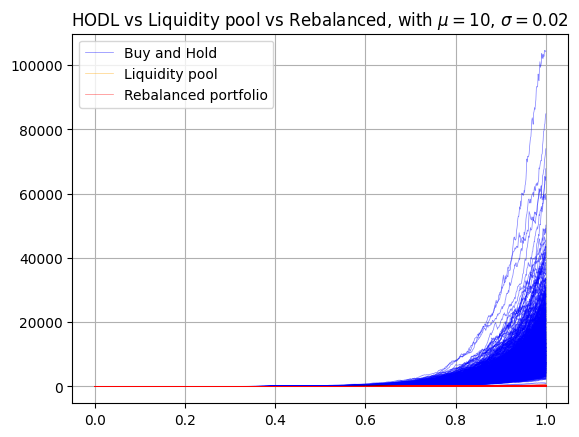

In [189]:
dt = 0.001
T = 1
t_array = np.arange(0, T+dt, dt)

mu = 10
sigma = 0.02
S_0 = 100

def simulate_gbm(mu, sigma, dt=0.01, T=1, S_0=100):
    t_array = np.arange(0, T+dt, dt)
    z_rand = np.random.normal(loc=0, scale=1, size=len(t_array))
    wienner_process = z_rand.cumsum()
    drift_arr = np.full(fill_value=(mu - np.pow(sigma, 2)/2)*dt, shape=len(t_array)).cumsum()

    gbm = S_0*np.exp(drift_arr + sigma*wienner_process)
    return gbm

c = 100
w_1 = 0.5
w_0 = 1 - w_1

N = 1000
gbms = [simulate_gbm(mu=mu, sigma=sigma, dt=dt, T=T, S_0=S_0) for i in range(N)]
gbm_matrix = np.vstack(gbms).T
# Simulating buy and hold
buy_n_hold_matrix = w_1*gbm_matrix + w_0*gbm_matrix[0]
buy_n_hold_matrix = buy_n_hold_matrix / buy_n_hold_matrix[0]

linewidth = 0.5
alpha = 0.5

for i in range(buy_n_hold_matrix.shape[1]-1):
    buy_n_hold = buy_n_hold_matrix[:, i]
    plt.plot(t_array, buy_n_hold, color='blue', alpha=alpha, linewidth=linewidth)
plt.plot(t_array, buy_n_hold_matrix[:, -1], color='blue', alpha=alpha, linewidth=linewidth, label='Buy and Hold')
#plt.hlines(y=1+np.log(gbms[-1][-1]/gbms[-1][0]), xmin=0, xmax=T)

s_matrix = c * 1/(w_0*w_1) * gbm_matrix**w_1
s_matrix = s_matrix / s_matrix[0]

for i in range(s_matrix.shape[1]-1):
    s = s_matrix[:, i]
    plt.plot(t_array, s, alpha=alpha, linewidth=linewidth, color='orange')
plt.plot(t_array, s_matrix[:, -1], alpha=alpha, linewidth=linewidth, color='orange', label='Liquidity pool')

gbm_returns_matrix = gbm_matrix[1:] / gbm_matrix[:-1]
rebalance_log_returns = np.log(w_1*gbm_returns_matrix + w_0)

rebalance_matrix = np.full(shape=gbm_matrix.shape, fill_value=np.log(100))

rebalance_matrix[1:] = rebalance_log_returns
rebalance_matrix = np.cumsum(rebalance_matrix, axis=0)
rebalance_matrix = np.exp(rebalance_matrix)
rebalance_matrix = rebalance_matrix / rebalance_matrix[0]

for i in range(rebalance_matrix.shape[1]-1):
    X = rebalance_matrix[:, i]
    plt.plot(t_array, X, alpha=alpha, linewidth=linewidth, color='red')
plt.plot(t_array, rebalance_matrix[:, -1], alpha=alpha, linewidth=linewidth, color='red', label='Rebalanced portfolio')

plt.title(f"HODL vs Liquidity pool vs Rebalanced, with $\mu = ${mu}, $\sigma = ${sigma}")
plt.grid()
plt.legend()
plt.show()

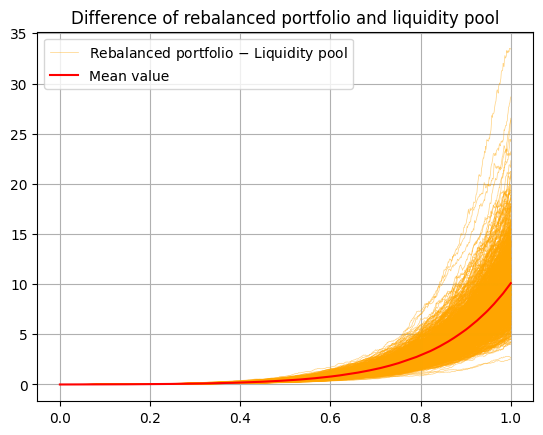

10.095270798534893


In [190]:
diff_rebalance = rebalance_matrix - s_matrix
for i in range(rebalance_matrix.shape[1]-1):
    diff_arr = diff_rebalance[:, i]
    plt.plot(t_array, diff_arr, alpha=alpha, linewidth=linewidth, color='orange')
plt.plot(t_array, diff_rebalance[:, -1], alpha=alpha, linewidth=linewidth, color='orange', label='Rebalanced portfolio $-$ Liquidity pool')

diff_rebalance_mean = np.mean(diff_rebalance, axis=1)
plt.plot(t_array, diff_rebalance_mean, color='red', label='Mean value')
plt.title("Difference of rebalanced portfolio and liquidity pool")
plt.grid()
plt.legend()
plt.show()
print((diff_rebalance_mean[-1] - diff_rebalance_mean[0]) / (t_array[-1] - t_array[0]))

In [180]:
def numerical_sharpe(data):
    data_adjusted = (data / data[0])
    returns = data_adjusted[-1] - 1
    mean_return = returns.mean()
    var = np.square(returns - mean_return).sum() / len(returns)
    s_std = np.sqrt(var)
    return mean_return, s_std

s_mean_return, s_std = numerical_sharpe(gbm_matrix)
print(s_mean_return)
print(s_std)
print(f"Sharpe Ratio: {s_mean_return/s_std}")

0.4131472594665354
1.078277488926774
Sharpe Ratio: 0.3831548592169416
